In [1]:
# https://www.youtube.com/watch?v=iX_on3VxZzk&t=41s
# La formula de celcius a fahrenheit es C * 1.8 + 32

In [3]:
!pip install tensorflow

In [4]:
import tensorflow as tf
import numpy as np

In [8]:
celcius = np.array([-40,-10,0,8,15,22,38], dtype=float)
fahrenheit = np.array([-40,14,32,46,59,72,100], dtype=float)

In [16]:
# Las capas densas son las que tienen conexiones desde cada
# neurona hacia todas las neuronas de la siguiente capa
# Ejemplo con 1 entrada y 1 salida
'''
capa = tf.keras.layers.Dense(units=1, input_shape=[1]) 
modelo = tf.keras.Sequential([capa])
'''


# Ejemplo con 1 entrada, 2 capas de 3 neuronas y 1 salida
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1]) 
oculta2 = tf.keras.layers.Dense(units=3) 
salida = tf.keras.layers.Dense(units=1) 
modelo = tf.keras.Sequential([oculta1, oculta2, salida])


In [17]:
# Como quiero que procese para que aprenda mejor?
# Optimizador Adam, le permite saber a la red como ajustar pesos y cesgos
# de manera eficiente para que aprenda y no desaprenda
# Tasa de aprendizaje, que tanto ajustar pyc
# Si el numero es pequeño aprendera lentamente
# Si es grande hara cambios muy grandes y no habra ajustes finos necesarios
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error' # Considera que una gran cantidad de errores grandes
    # es peor que una gran cantidad de errores pequeños
)

print('Empieza el entrenamiento...')
# Fit entrena, (entrada, salida, vueltas)
historial = modelo.fit(celcius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

Empieza el entrenamiento...
Modelo entrenado!


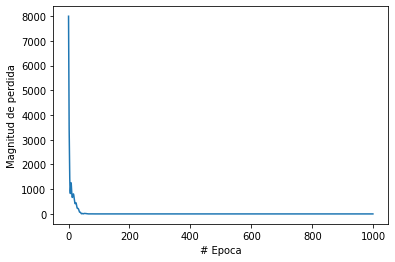

In [18]:
# Ver resultado de FUNCION DE PERDIDA
# Te dice que tan mal estan los resultados en cada vuelta que dio

import matplotlib.pyplot as plt 
plt.xlabel('# Epoca')
plt.ylabel('Magnitud de perdida')
plt.plot(historial.history['loss'])

# En este caso mientras mas vueltas, los errores van disminuyendo

In [19]:
# Prediccion
print('Hacemos una prediccion')
resultado = modelo.predict([100.0])
print('El resultado es ' + str(resultado) + ' fahrenheit!')

Hacemos una prediccion
1/1 [==============================] - 0s 58ms/step
El resultado es [[211.74747]] fahrenheit!


In [22]:
# Vemos estructura interna de la red
print('Variables internas del modelo')
print(capa.get_weights())

print('Variables internas del modelo de 2 capas ocultas')
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

# Nos damos cuenta que el peso lo asigno a 1.79 y el cesgo a 31.91

Variables internas del modelo
[array([[1.7983055]], dtype=float32), array([31.911165], dtype=float32)]
Variables internas del modelo de 2 capas ocultas
[array([[ 0.28071538, -0.36740425,  0.47717467]], dtype=float32), array([ 3.7083254, -4.054995 ,  1.7958176], dtype=float32)]
[array([[ 0.10442724, -0.7881118 ,  1.7930943 ],
       [-0.8958309 ,  0.76848763, -1.007076  ],
       [-0.5025559 ,  0.00773766,  0.27947792]], dtype=float32), array([ 1.7860475, -2.4145572,  4.2349544], dtype=float32)]
[array([[ 0.08402313],
       [-0.44040567],
       [ 1.5573728 ]], dtype=float32), array([3.731327], dtype=float32)]
